In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required packages
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# models
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# metrics
import time
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# load dataset into dataframe
df = pd.read_csv('../data/data.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
df.head()

(88647, 112)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
# describe the dataset
# statistical description of each feature
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
# null value counts
# no null values in any column
pd.DataFrame(np.asarray(df.isnull().sum()).reshape(-1, 112), columns=df.columns)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    58000
1    30647
Name: phishing, dtype: int64


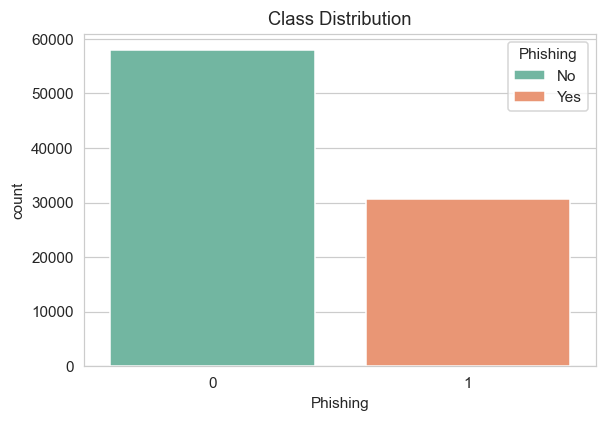

In [6]:
# class distribution
print(df['phishing'].value_counts())

# plot the class distribution
plt.figure(dpi=110)

chart = sns.countplot(x='phishing', data=df, hue='phishing', dodge=False, palette='Set2')

axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Phishing')
axes.legend(['No', 'Yes'], title='Phishing')

plt.show()

In [7]:
# handle duplicate datapoints
print("No of duplicate columns: ",df.duplicated(keep='first').sum())

# drop duplicate rows
df.drop_duplicates(inplace=True)

# shape after dropping duplicates
df.shape

No of duplicate columns:  1438


(87209, 112)

In [8]:
# handle columns with single value
# 0 variance => no information
single_val_cols = []

# for all columns
for i in df.columns:
    # columns with only 1 unique value
    if df[i].nunique()==1:
        single_val_cols.append(i)
        
# print all single value columns
display(single_val_cols)
        
# drop single value columns
df.drop(single_val_cols, axis=1, inplace =True)

# shape after dropping single value columns
df.shape

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

(87209, 99)

In [9]:
# columns with invalid(-1) values
# proportion of -1 in such columns
cols_with_neg_1 = {} 

for i in df.columns:
    x = df[i].value_counts(normalize=True)
    if df[i].isin([-1]).any():
        cols_with_neg_1[i] = x[-1]

# -1 can be replaced with NaN and imputed using mean or knn imputer    
# print the columns with -1 along with the proportion
cols_with_neg_1

{'qty_dot_directory': 0.5311722413971035,
 'qty_hyphen_directory': 0.5311722413971035,
 'qty_underline_directory': 0.5311722413971035,
 'qty_slash_directory': 0.5311722413971035,
 'qty_questionmark_directory': 0.5311722413971035,
 'qty_equal_directory': 0.5311722413971035,
 'qty_at_directory': 0.5311722413971035,
 'qty_and_directory': 0.5311722413971035,
 'qty_exclamation_directory': 0.5311722413971035,
 'qty_space_directory': 0.5311722413971035,
 'qty_tilde_directory': 0.5311722413971035,
 'qty_comma_directory': 0.5311722413971035,
 'qty_plus_directory': 0.5311722413971035,
 'qty_asterisk_directory': 0.5311722413971035,
 'qty_hashtag_directory': 0.5311722413971035,
 'qty_dollar_directory': 0.5311722413971035,
 'qty_percent_directory': 0.5311722413971035,
 'directory_length': 0.5311722413971035,
 'qty_dot_file': 0.5311722413971035,
 'qty_hyphen_file': 0.5311722413971035,
 'qty_underline_file': 0.5311722413971035,
 'qty_slash_file': 0.5311722413971035,
 'qty_questionmark_file': 0.531172

## Note:
> - The author of the dataset provides no information about the presence of -1 values in columns.
> - Given the huge amount of -1 values in the dataset, we take an alternate approach and treat -1 values as valid values.
> - No imputation or dropping of the -1 value columns or rows is done, and the values are used as it is for training and testing various models.

----

## Feature Importance
- Importance analysis with XGBoost
- Importance analysis with Logistic Regression
- Retain important features

In [10]:
# separate independent and dependent features for feature importance analysis
X = df.drop('phishing', axis=1)
y = df['phishing']

In [11]:
# feature importance analysis using XGBoost
# instantiate an XGBoost model
model = XGBClassifier(n_estimators=100)

# training start
print('training XGBoost...')
start_time = time.time()

# train the model
model.fit(X, y)

# training end
end_time = time.time()
print('training end:', '{:.2f}'.format(end_time - start_time), 'seconds elapsed!')

training XGBoost...
training end: 8.70 seconds elapsed!


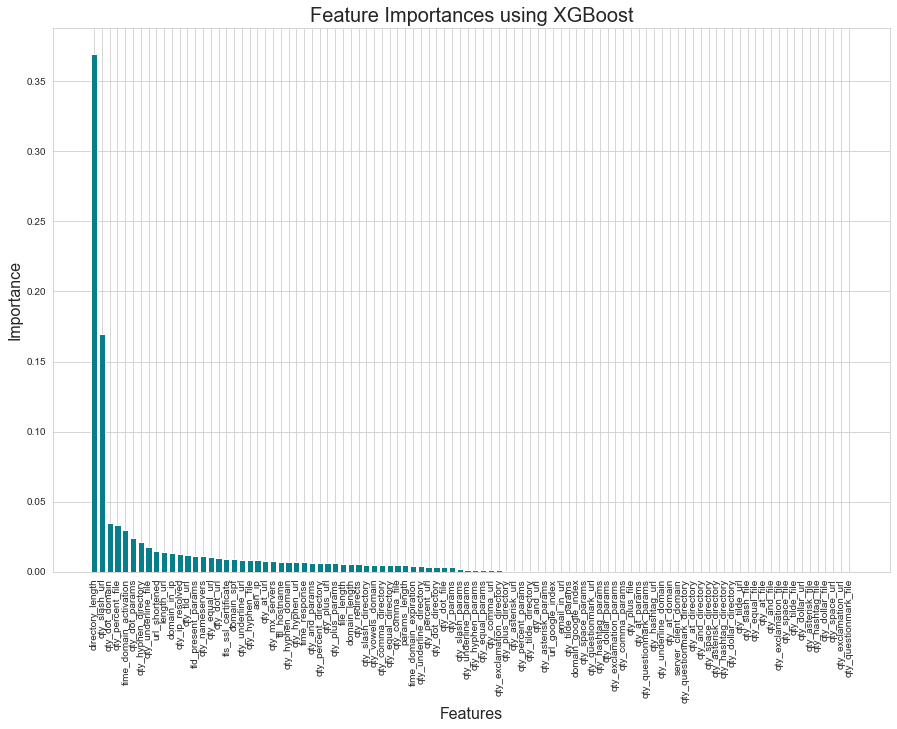

In [12]:
# create a mapping of features and feature importance
imp_features_xgb = pd.DataFrame(
    {
        'features': X.columns,
        'importance': model.feature_importances_
    }
)

# sort the features by their feature importance in descending order
imp_features_xgb = imp_features_xgb.sort_values(by='importance', ascending=False)

# plot the feature importance
plt.figure(figsize=(15,10))

plt.bar(x=imp_features_xgb['features'], height=imp_features_xgb['importance'], color='#087E8B')

plt.title('Feature Importances using XGBoost', size=20)
plt.xlabel('Features', size=16)
plt.ylabel('Importance', size=16)
plt.xticks(rotation='vertical')

plt.show()

In [13]:
# important features with XGBoost
# extract the features with importance greater than 0
imp_features_xgb = [feat for feat,imp in zip(imp_features_xgb['features'], imp_features_xgb['importance']) if imp>0]

# list all such important features
display(imp_features_xgb)

# number of important features
len(imp_features_xgb)

['directory_length',
 'qty_slash_url',
 'qty_dot_domain',
 'qty_percent_file',
 'time_domain_activation',
 'qty_dot_params',
 'qty_hyphen_directory',
 'qty_underline_file',
 'url_shortened',
 'length_url',
 'domain_in_ip',
 'qty_ip_resolved',
 'qty_tld_url',
 'tld_present_params',
 'qty_nameservers',
 'qty_equal_url',
 'qty_dot_url',
 'tls_ssl_certificate',
 'domain_spf',
 'qty_underline_url',
 'qty_hyphen_file',
 'asn_ip',
 'qty_at_url',
 'qty_mx_servers',
 'ttl_hostname',
 'qty_hyphen_domain',
 'qty_hyphen_url',
 'time_response',
 'qty_and_params',
 'qty_percent_directory',
 'qty_plus_url',
 'qty_plus_params',
 'file_length',
 'domain_length',
 'qty_redirects',
 'qty_slash_directory',
 'qty_vowels_domain',
 'qty_comma_directory',
 'qty_equal_directory',
 'qty_comma_file',
 'params_length',
 'time_domain_expiration',
 'qty_underline_directory',
 'qty_percent_url',
 'qty_dot_directory',
 'qty_dot_file',
 'qty_params',
 'qty_slash_params',
 'qty_underline_params',
 'qty_hyphen_params',


58